# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cnt = 0
A   = []
B   = []
while(cnt < 256): # 계수 행렬을 만들어 줌
    i   = 0
    row = []
    if(cnt == 0): # 첫 번째 행에 대해서
        row.append(-2)
        row.append(1)
        while (i < 254):
            row.append(0)
            i = i + 1
    elif(cnt == 255): # 마지막 행에 대해서
        while(i < 254):
            row.append(0)
            i = i + 1
        row.append(1)
        row.append(-2)
    else: # 나머지 경우에 대해서
        while (i < 256):
            if(i ==  (cnt-1)):
                row.append(1)
                row.append(-2)
                row.append(1)
                i = i + 3
            else:
                row.append(0)
                i = i + 1
    A.append(row)
    cnt = cnt + 1

i = 0
while(i < 256): # b 벡터를 만들어 줌
    a = (-1) * (2 * np.pi / 256)**2 * np.cos(2 * np.pi * i / 256)
    B.append(a)
    i = i + 1

In [3]:
# Gauss - Jordan elimination method
N = len(A)
x = np.zeros(N)

for j in range(N):
    for i in range(j+1, N):
        coef = A[i][j]/A[j][j]
        for k in range(N):
            A[i][k] -= coef * A[j][k]
        B[i] -= coef * B[j]

x[N-1] = B[N-1]/A[N-1][N-1]
for k in range(N-1, -1, -1):
    sum = np.dot(A[k][k+1:],x[k+1:])
    x[k] = (B[k] - sum)/A[k][k]

In [4]:
# 위와 동일한 방식으로 행렬을 만들어줌.
cnt = 0
A   = []
B   = []
while(cnt < 256):
    i   = 0
    row = []
    if(cnt == 0):
        row.append(-2)
        row.append(1)
        while (i < 254):
            row.append(0)
            i = i + 1
    elif(cnt == 255):
        while(i < 254):
            row.append(0)
            i = i + 1
        row.append(1)
        row.append(-2)
    else:
        while (i < 256):
            if(i ==  (cnt-1)):
                row.append(1)
                row.append(-2)
                row.append(1)
                i = i + 3
            else:
                row.append(0)
                i = i + 1
    A.append(row)
    cnt = cnt + 1
    
i = 0
while(i < 256):
    a = (-1) * (2 * np.pi / 256)**2 * np.cos(2 * np.pi * i / 256)
    B.append(a)
    i = i + 1

# forward and backward substitutions method
a = []
b = []
c = []
i , j , k = 0 , 0 , 0
while (i < 256):
    if(i == 0):
        a.append(0)
    else:
        a.append(1)
    i = i + 1
while(j < 256):
    b.append(-2)
    j = j + 1
while(k < 256):
    if(k == 255):
        c.append(0)
    else:
        c.append(1)
    k = k + 1

n = len(A)
r   = B
rho = np.zeros(n)
gam = np.zeros(n)
bet = b[0]
rho[0] = r[0] / bet
for i in range(1,n):
    gam[i-1] = c[i-1] / bet
    bet      = b[i] - a[i] * gam[i-1]
    rho[i]   = (r[i] - a[i] * rho[i-1]) / bet

y = np.zeros(n)
y[n-1] = rho[n-1]
for j in range(n-2,-1,-1):
    y[j] = rho[j] - gam[j] * y[j+1]

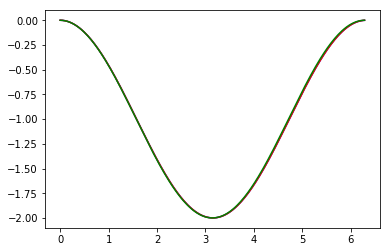

In [5]:
t = np.linspace(0,2*np.pi,256)
plt.plot(t,x,'b')
plt.plot(t,y,'r')
plt.plot(t,np.cos(t)-1,'g')

# constant 가 거의 -1 이라는 사실을 대략적으로 확인할 수 있음.

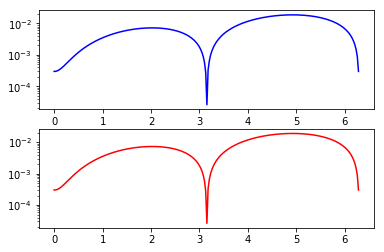

In [6]:
t = np.linspace(0,2*np.pi,256)
plt.subplot(2,1,1)
plt.semilogy(t,np.abs(x-np.cos(t)+1),'b')
plt.subplot(2,1,2)
plt.semilogy(t,np.abs(y-np.cos(t)+1),'r')
# 각 method의 해와 (cos(x)-1) 사이의 차를 log scale로 그려보았다.
# 참값과 차이가 0.01 이내로 나타남을 확인할 수 있다.